# CAPSTONE PROJECT

## Common

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import ipywidgets as widgets
import sklearn.metrics as met
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from ipywidgets import HBox
from ipywidgets import VBox
from ipywidgets import Layout
from ipywidgets import Dropdown
from ipywidgets import interactive
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression

In [2]:
COL_NAME_HTL = 'Hotel'
COL_NAME_LEAD_TIME = 'Lead Time'
COL_NAME_ARR_DATE_D = 'Arrival Date Day'
COL_NAME_ARR_DATE_M = 'Arrival Date Month'
COL_NAME_ARR_DATE_Y = 'Arrival Date Year'
COL_NAME_ARR_DATE = 'Arrival Date'
COL_NAME_WKDAY = 'Weekday'
COL_NAME_ADT = 'Adults'
COL_NAME_CHLDN = 'Children'
COL_NAME_CNTRY = 'Country'
COL_NAME_MKT_SEG = 'Market Segment'
COL_NAME_AGT = 'Agent'
COL_NAME_CUST_TYPE = 'Customer Type'
COL_NAME_AVG_DLY_RATE = 'Average Daily Rate'
COL_NAME_CNTRY_NAME = 'Country Name'

In [3]:
month_ord = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
wkday_ord = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [4]:
htl_base_clr = ['#636EFA', '#EF553B']

In [5]:
df = pd.read_csv('data_valid.csv')
cntry_codes_df = pd.read_excel('country_codes_list.xlsx')
merged_df = pd.merge(df,
                     cntry_codes_df,
                     on=COL_NAME_CNTRY,
                     how='left')

In [6]:
# Create dropdown list
def crt_ddl(col_name, desc, percent='15%', default='All'):
    list = df[col_name].unique().tolist()
    list.append('All')
    return Dropdown(
        options=list,
        value=default,
        description=f'{desc}: ',
        style={'description_width': 'initial'},
        layout={'width': percent, 'margin': '0 auto'})

## Univariate Analysis

In [7]:
df[COL_NAME_ARR_DATE_Y] = df[COL_NAME_ARR_DATE_Y].astype(str)

merged_df[COL_NAME_ARR_DATE_Y] = merged_df[COL_NAME_ARR_DATE_Y].astype(str)

In [8]:
# Univariate mod dataframe
def uv_mod_df(year, mkt_seg, cust_type):
    fltr_df = df if year == 'All' else df[df[COL_NAME_ARR_DATE_Y] == year]
    fltr_df = fltr_df if mkt_seg == 'All' else fltr_df[fltr_df[COL_NAME_MKT_SEG] == mkt_seg]
    return fltr_df if cust_type == 'All' else fltr_df[fltr_df[COL_NAME_CUST_TYPE] == cust_type]

In [9]:
# Univariate Hotel
def uv_htl(year, mkt_seg, cust_type):
    cnts = uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_HTL].value_counts()
    return go.Pie(labels=cnts.index,
                  values=cnts.values,
                  hole=.5,
                  name='Hotel')

In [10]:
# Univariate Lead Time
def uv_lead_time(year, mkt_seg, cust_type):
    return go.Histogram(x=uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_LEAD_TIME],
                        nbinsx=30,
                        name='Day')

In [11]:
# Univariate Arrival Date Day
def uv_arr_date_day(year, mkt_seg, cust_type):
    cnts = uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_ARR_DATE_D].value_counts().sort_index()
    return go.Bar(x=cnts.index,
                  y=cnts.values,
                  name='Day')

In [12]:
# Univariate Weekday
def uv_wkday(year, mkt_seg, cust_type):
    cnts = uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_WKDAY].astype(CategoricalDtype(categories=wkday_ord,
                                                                                            ordered=True)).value_counts().sort_index()
    return go.Bar(x=cnts.index.str[:3],
                  y=cnts.values,
                  hovertext=wkday_ord,
                  name='Weekday')

In [13]:
# Univariate Arrival Date Month
def uv_arr_date_month(year, mkt_seg, cust_type):
    cnts = uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_ARR_DATE_M].astype(CategoricalDtype(categories=month_ord,
                                                                                            ordered=True)).value_counts().sort_index()
    return go.Bar(x=cnts.index.str[:3],
                  y=cnts.values,
                  hovertext=month_ord,
                  name='Month')

In [14]:
# Univariate Arrival Date Year
def uv_arr_date_year(year, mkt_seg, cust_type):
    cnts = uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_ARR_DATE_Y].value_counts().sort_index()
    return go.Pie(labels=cnts.index,
                  values=cnts.values,
                  hole=.5,
                  name='Year')

In [15]:
# Univariate Country
def uv_cntry(year, mkt_seg, cust_type):
    new_df = pd.merge(cntry_codes_df,
                      uv_mod_df(year, mkt_seg, cust_type).groupby([COL_NAME_CNTRY]).size().reset_index(name='Count'),
                      how='inner')
    return go.Choropleth(locations=new_df[COL_NAME_CNTRY],
                         z=new_df['Count'],
                         hovertext=new_df[COL_NAME_CNTRY_NAME],
                         colorscale='reds',
                         showscale=False,
                         name='Country')

In [16]:
# Univariate Adults
def uv_adt(year, mkt_seg, cust_type):
    cnts = uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_ADT].value_counts().sort_index()
    return go.Pie(labels=cnts.index,
                  values=cnts.values,
                  hole=.5,
                  rotation=315,
                  name='N.O. Adults')

In [17]:
# Univariate Children
def uv_chldn(year, mkt_seg, cust_type):
    cnts = uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_CHLDN].value_counts().sort_index()
    return go.Pie(labels=cnts.index,
                  values=cnts.values,
                  hole=.5,
                  rotation=270,
                  name='N.O. Children')

In [18]:
# Univariate Market Segment
def uv_mrk_seg(year, mkt_seg, cust_type):
    cnts = uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_MKT_SEG].value_counts().sort_index()
    return go.Pie(labels=cnts.index,
                  values=cnts.values,
                  hole=.5,
                  rotation=315,
                  name='Name')

In [19]:
# Univariate Agent
def uv_agt(year, mkt_seg, cust_type):
    return go.Histogram(x=uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_AGT],
                        name='ID')

In [20]:
# Univariate Customer Type
def uv_cust_type(year, mkt_seg, cust_type):
    cnts = uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_CUST_TYPE].value_counts().sort_index()
    return go.Pie(labels=cnts.index,
                  values=cnts.values,
                  hole=.5,
                  rotation=270,
                  name='Type')

In [21]:
# Average Daily Rate
def uv_avg_dly_rate(year, mkt_seg, cust_type):
    return go.Histogram(x=uv_mod_df(year, mkt_seg, cust_type)[COL_NAME_AVG_DLY_RATE],
                        nbinsx=50,
                        name='USD')

In [22]:
# Univariate dashboard
def uv_db(year='All', mkt_seg='All', cust_type='All'):
    figs = sp.make_subplots(7, 4,
                            specs=[[{'type': 'pie', 'rowspan': year == 'All' and 1 or 2, 'colspan': 1}, {'type': 'pie'}, {'type': 'pie'}, {}],
                                   [{'type': 'pie'}, {}, {}, {}],
                                   [{'rowspan': 1, 'colspan': mkt_seg == 'All'and 1 or 2}, {'type': 'pie'}, {'type': cust_type == 'All' and 'pie' or 'histogram', 'rowspan': 1, 'colspan': cust_type == 'All' and 1 or 2}, {}],
                                   [{'type': 'choropleth', 'rowspan': 4, 'colspan': 4}, None, None, None],
                                   [None, None, None, None],
                                   [None, None, None, None],
                                   [None, None, None, None]],
                            subplot_titles=[COL_NAME_HTL, COL_NAME_ADT, COL_NAME_CHLDN, COL_NAME_AVG_DLY_RATE,
                                            year == 'All' and COL_NAME_ARR_DATE_Y or '', COL_NAME_WKDAY, COL_NAME_ARR_DATE_M, COL_NAME_ARR_DATE_D,
                                            COL_NAME_LEAD_TIME, mkt_seg == 'All' and COL_NAME_MKT_SEG or '', cust_type == 'All' and COL_NAME_CUST_TYPE or COL_NAME_AGT, cust_type == 'All' and COL_NAME_AGT or ''])
    figs.add_trace(uv_htl(year, mkt_seg, cust_type), 1, 1)
    figs.add_trace(uv_adt(year, mkt_seg, cust_type), 1, 2)
    figs.add_trace(uv_chldn(year, mkt_seg, cust_type), 1, 3)
    figs.add_trace(uv_avg_dly_rate(year, mkt_seg, cust_type), 1, 4)
    if year == 'All':
        figs.add_trace(uv_arr_date_year(year, mkt_seg, cust_type), 2, 1)
    figs.add_trace(uv_arr_date_month(year, mkt_seg, cust_type), 2, 2)
    figs.add_trace(uv_wkday(year, mkt_seg, cust_type), 2, 3)
    figs.add_trace(uv_arr_date_day(year, mkt_seg, cust_type), 2, 4)
    figs.add_trace(uv_lead_time(year, mkt_seg, cust_type), 3, 1)
    if mkt_seg == 'All':
        figs.add_trace(uv_mrk_seg(year, mkt_seg, cust_type), 3, 2)
    if cust_type == 'All':
        figs.add_trace(uv_cust_type(year, mkt_seg, cust_type), 3, 3)
    figs.add_trace(uv_agt(year, mkt_seg, cust_type), 3, cust_type == 'All' and 4 or 3)
    figs.add_trace(uv_cntry(year, mkt_seg, cust_type), 4, 1)
    figs.update_layout(height=1000,
                       title_text='EDA Univariate Analysis for Portugal Hotel Booking',
                       showlegend=False)
    figs.show()

year_ddl = crt_ddl(COL_NAME_ARR_DATE_Y, 'Year', default='2015')
mkt_seg_ddl = crt_ddl(COL_NAME_MKT_SEG, COL_NAME_MKT_SEG, '25%')
cust_type_ddl = crt_ddl(COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE, '25%')

widget = interactive(uv_db,
                     year=year_ddl,
                     mkt_seg=mkt_seg_ddl,
                     cust_type=cust_type_ddl)

display(VBox([HBox(widget.children[:-1]), widget.children[-1]]))

year_ddl.index = 3

## Multivariate Analysis

In [23]:
df[COL_NAME_AGT] = df[COL_NAME_AGT].astype(str)

In [24]:
# Multivariate mod dataframe
def mv_mod_df(year, expand=False):
    base_df = merged_df if expand else df
    return base_df if year == 'All' else base_df[base_df[COL_NAME_ARR_DATE_Y] == year]

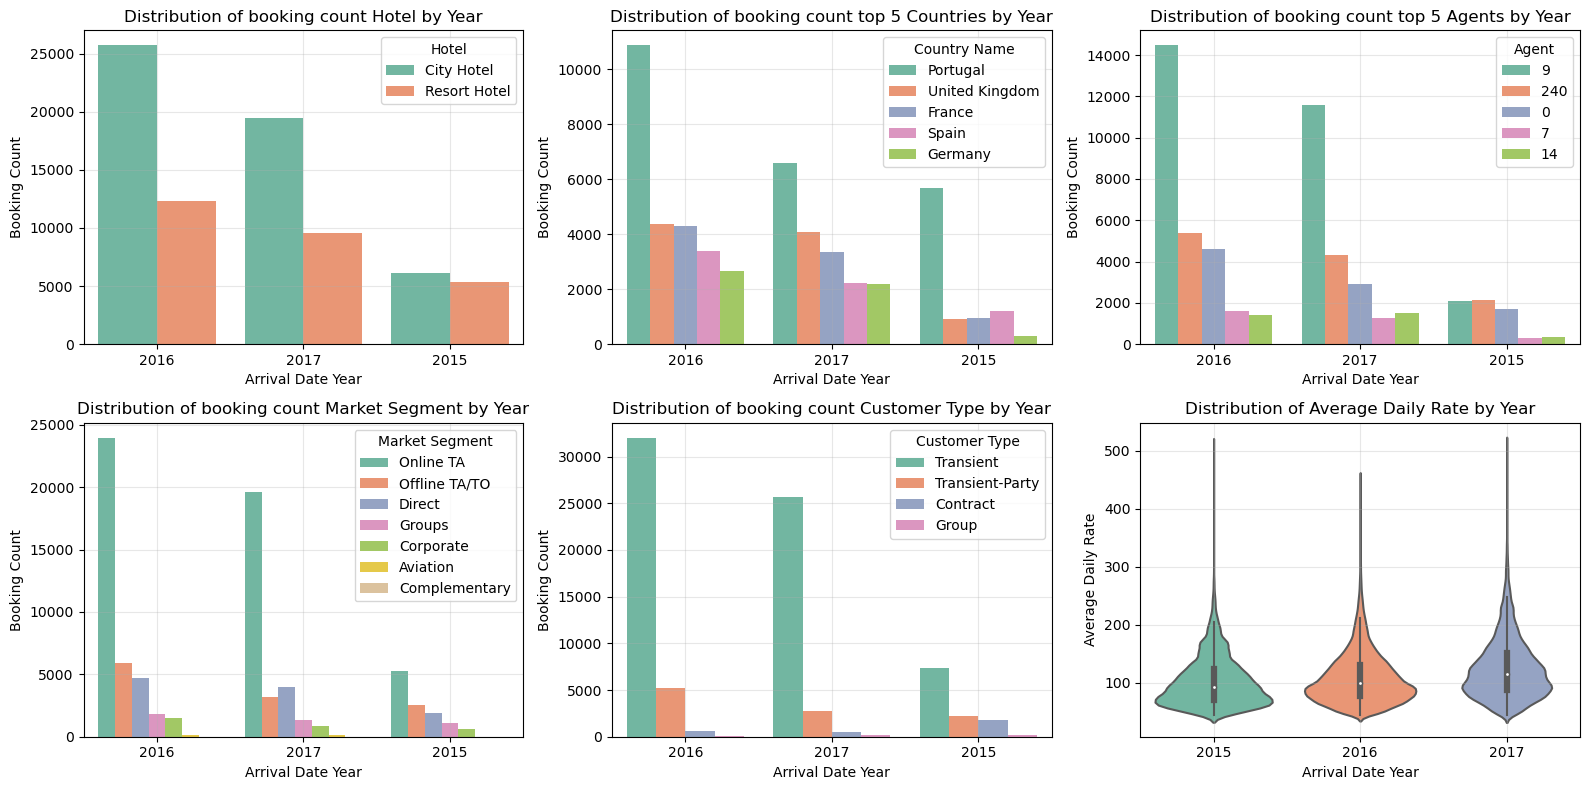

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

sns.barplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_HTL,
            data=df.groupby([COL_NAME_HTL, COL_NAME_ARR_DATE_Y]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            palette='Set2',
            ax=axes[0, 0])
axes[0, 0].set_title(f'Distribution of booking count {COL_NAME_HTL} by Year')
axes[0, 0].grid(alpha=.3)

sns.barplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_CNTRY_NAME,
            data=merged_df[merged_df[COL_NAME_CNTRY_NAME].isin(merged_df.groupby(COL_NAME_CNTRY_NAME).size().nlargest(5).index)][[COL_NAME_ARR_DATE_Y, COL_NAME_CNTRY_NAME]].groupby([COL_NAME_ARR_DATE_Y, COL_NAME_CNTRY_NAME]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            palette='Set2',
            ax=axes[0, 1])
axes[0, 1].set_title('Distribution of booking count top 5 Countries by Year')
axes[0, 1].grid(alpha=.3)

sns.barplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_AGT,
            data=df[df[COL_NAME_AGT].isin(df.groupby(COL_NAME_AGT).size().nlargest(5).index)][[COL_NAME_ARR_DATE_Y, COL_NAME_AGT]].groupby([COL_NAME_ARR_DATE_Y, COL_NAME_AGT]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            palette='Set2',
            ax=axes[0, 2])
axes[0, 2].set_title('Distribution of booking count top 5 Agents by Year')
axes[0, 2].grid(alpha=.3)

sns.barplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_MKT_SEG,
            data=df.groupby([COL_NAME_ARR_DATE_Y, COL_NAME_MKT_SEG]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            palette='Set2',
            ax=axes[1, 0])
axes[1, 0].set_title(f'Distribution of booking count {COL_NAME_MKT_SEG} by Year')
axes[1, 0].grid(alpha=.3)

sns.barplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_CUST_TYPE,
            data=df.groupby([COL_NAME_ARR_DATE_Y, COL_NAME_CUST_TYPE]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            palette='Set2',
            ax=axes[1, 1])
axes[1, 1].set_title(f'Distribution of booking count {COL_NAME_CUST_TYPE} by Year')
axes[1, 1].grid(alpha=.3)

sns.violinplot(data=df, x=COL_NAME_ARR_DATE_Y, y=COL_NAME_AVG_DLY_RATE, palette='Set2', ax=axes[1, 2])
axes[1, 2].set_title(f'Distribution of {COL_NAME_AVG_DLY_RATE} by Year')
axes[1, 2].grid(alpha=.3)

plt.tight_layout()
plt.show()

In [26]:
# Multivariate Hotel & Lead Time
def mv_htl_lead_time(year):
    sns.kdeplot(data=mv_mod_df(year),
                x=COL_NAME_LEAD_TIME,
                hue=COL_NAME_HTL,
                fill=True,
                palette=list(reversed(sns.color_palette('Set2',
                                                        n_colors=len(df[COL_NAME_HTL].unique())))))
    plt.title(f'Kernel density estimation of {COL_NAME_HTL} and {COL_NAME_LEAD_TIME} by Year ({year})')
    plt.grid(alpha=.3)
    plt.show()

display(VBox([interactive(mv_htl_lead_time,
                          year=crt_ddl(COL_NAME_ARR_DATE_Y, 'Year', '20%'))],
                          layout=Layout(align_items='center')))

In [27]:
# Multivariate Hotel & Arrival Date Day
def mv_htl_arr_date_day(year):
    grped_df = mv_mod_df(year).groupby([COL_NAME_HTL, COL_NAME_ARR_DATE_D]).size().reset_index(name='Booking Count')
    fig = go.Figure()
    for htl in grped_df[COL_NAME_HTL].unique():
        htl_df = grped_df[grped_df[COL_NAME_HTL] == htl]
        fig.add_trace(go.Scatter(x=htl_df[COL_NAME_ARR_DATE_D],
                                 y=htl_df['Booking Count'],
                                 mode='lines',
                                 name=htl))
    return fig

In [28]:
# Multivariate Hotel & Weekday
def mv_htl_wkday(year):
    grped_df = mv_mod_df(year).groupby([COL_NAME_HTL, COL_NAME_WKDAY]).size().reset_index(name='Booking Count')
    grped_df[COL_NAME_WKDAY] = pd.Categorical(grped_df[COL_NAME_WKDAY],
                                              categories=wkday_ord,
                                              ordered=True)
    grped_df = grped_df.sort_values([COL_NAME_WKDAY])
    grped_df[COL_NAME_WKDAY] = grped_df[COL_NAME_WKDAY].apply(lambda x: x[:3])
    fig = go.Figure()
    for htl in grped_df[COL_NAME_HTL].unique():
        htl_df = grped_df[grped_df[COL_NAME_HTL] == htl]
        fig.add_trace(go.Scatter(x=htl_df[COL_NAME_WKDAY],
                                 y=htl_df['Booking Count'],
                                 hovertext=wkday_ord,
                                 mode='lines',
                                 name=htl))
    return fig

In [29]:
# Multivariate Hotel & Arrival Date Month
def mv_htl_arr_date_month(year):
    grped_df = mv_mod_df(year).groupby([COL_NAME_HTL, COL_NAME_ARR_DATE_M]).size().reset_index(name='Booking Count')
    grped_df[COL_NAME_ARR_DATE_M] = pd.Categorical(grped_df[COL_NAME_ARR_DATE_M],
                                                   categories=month_ord,
                                                   ordered=True)
    grped_df = grped_df.sort_values([COL_NAME_ARR_DATE_M])
    grped_df[COL_NAME_ARR_DATE_M] = grped_df[COL_NAME_ARR_DATE_M].apply(lambda x: x[:3])
    fig = go.Figure()
    for htl in grped_df[COL_NAME_HTL].unique():
        htl_df = grped_df[grped_df[COL_NAME_HTL] == htl]
        fig.add_trace(go.Scatter(x=htl_df[COL_NAME_ARR_DATE_M],
                                 y=htl_df['Booking Count'],
                                 hovertext=month_ord,
                                 mode='lines',
                                 name=htl))
    return fig

In [30]:
# Multivariate Hotel & guest
def mv_htl_guest(year):
    mod_df = mv_mod_df(year)
    chldn_df = mod_df.groupby([COL_NAME_HTL])[COL_NAME_CHLDN].sum().reset_index(name=f'Total Children')
    adt_df = mod_df.groupby([COL_NAME_HTL])[COL_NAME_ADT].sum().reset_index(name=f'Total Adults')
    fig = sp.make_subplots(1, 2,
                           specs=[[{'type': 'domain'}, {'type': 'domain'}]])
    fig.add_trace(go.Pie(values=chldn_df[f'Total Children'],
                         labels=chldn_df[COL_NAME_HTL],
                         name=COL_NAME_CHLDN,
                         hole=.4,
                         texttemplate='     %{percent:.1%}     ',
                         marker=dict(line=dict(color='#ffffff',
                                               width=1),
                                     colors=htl_base_clr)), 1, 1)
    fig.add_trace(go.Pie(values=adt_df[f'Total Adults'],
                         labels=adt_df[COL_NAME_HTL],
                         name=COL_NAME_ADT,
                         hole=.7,
                         texttemplate='%{percent:.1%}',
                         marker=dict(line=dict(color='#ffffff',
                                               width=1),
                                     colors=htl_base_clr)), 1, 1)
    return fig

In [31]:
# Multivariate Hotel & Country
def mv_htl_cntry(year):
    mod_df = mv_mod_df(year, True)
    grped_df = mod_df.groupby([COL_NAME_HTL, COL_NAME_CNTRY_NAME]).size().reset_index(name='Booking Count')
    fig = px.bar(grped_df[grped_df[COL_NAME_CNTRY_NAME].isin(mod_df.groupby(COL_NAME_CNTRY_NAME).size().nlargest(5).index)],
                 x=COL_NAME_CNTRY_NAME,
                 y='Booking Count',
                 category_orders={COL_NAME_HTL: sorted(mod_df[COL_NAME_HTL].unique())},
                 color=COL_NAME_HTL)
    return fig

In [32]:
# Multivariate Hotel & Market Segment
def mv_htl_mkt_seg(year):
    mod_df = mv_mod_df(year)
    fig = px.bar(mod_df.groupby([COL_NAME_HTL, COL_NAME_MKT_SEG]).size().reset_index(name='Booking Count'),
                 x=COL_NAME_MKT_SEG,
                 y='Booking Count',
                 category_orders={COL_NAME_HTL: sorted(mod_df[COL_NAME_HTL].unique())},
                 color=COL_NAME_HTL)
    return fig

In [33]:
# Multivariate Hotel & Agent
def mv_htl_agt(year):
    mod_df = mv_mod_df(year)
    grped_df = mod_df.groupby([COL_NAME_HTL, COL_NAME_AGT]).size().reset_index(name='Booking Count')
    fig = px.bar(grped_df[grped_df[COL_NAME_AGT].isin(mod_df.groupby(COL_NAME_AGT).size().nlargest(5).index)],
                 x=COL_NAME_AGT,
                 y='Booking Count',
                 category_orders={COL_NAME_HTL: sorted(mod_df[COL_NAME_HTL].unique())},
                 color=COL_NAME_HTL)
    return fig

In [34]:
# Multivariate Hotel & Customer Type
def mv_htl_cust_type(year):
    mod_df = mv_mod_df(year)
    fig = px.bar(mod_df.groupby([COL_NAME_HTL, COL_NAME_CUST_TYPE]).size().reset_index(name='Booking Count'),
                 x=COL_NAME_CUST_TYPE,
                 y='Booking Count',
                 category_orders={COL_NAME_HTL: sorted(mod_df[COL_NAME_HTL].unique())},
                 color=COL_NAME_HTL)
    return fig

In [35]:
# Multivariate Hotel & Average Daily Rate
def mv_htl_avg_dly_rate(year):
    mod_df = mv_mod_df(year)
    fig = sp.make_subplots(1, 1,
                           shared_yaxes=True)
    for htl in mod_df[COL_NAME_HTL].sort_index(ascending=False).unique():
        fig.add_trace(go.Violin(x=mod_df[COL_NAME_HTL][mod_df[COL_NAME_HTL] == htl],
                                y=mod_df[COL_NAME_AVG_DLY_RATE][mod_df[COL_NAME_HTL] == htl],
                                name=htl,
                                box_visible=True,
                                meanline_visible=True,
                                jitter=.05), 1, 1)
    return fig

In [36]:
# Multivariate Hotel & Lead Time & Average Daily Rate
def mv_htl_lead_time_avg_dly_rate(year):
    mod_df = mv_mod_df(year)
    reverse_clr = htl_base_clr[:][::-1]
    fig = px.scatter(mod_df,
                     x=COL_NAME_LEAD_TIME,
                     y=COL_NAME_AVG_DLY_RATE,
                     opacity=.7,
                     color_discrete_sequence=reverse_clr,
                     color=COL_NAME_HTL)
    return fig

In [37]:
# Multivariate dashboard
def mv_db(year='All'):
    figs = sp.make_subplots(5, 4,
                            specs=[[{'type': 'pie', 'rowspan': 2, 'colspan': 1}, {}, {'rowspan': 1, 'colspan': 2}, None],
                                   [None, {}, {'rowspan': 1, 'colspan': 2}, None], [{}, {}, {'rowspan': 1, 'colspan': 2}, None],
                                   [{'rowspan': 2, 'colspan': 2}, None, {'rowspan': 2, 'colspan': 2}, None],
                                   [None, None, None, None]],
                            subplot_titles=[f'{COL_NAME_ADT} & {COL_NAME_CHLDN}', COL_NAME_AGT, COL_NAME_ARR_DATE_D,
                                            COL_NAME_CUST_TYPE, COL_NAME_WKDAY,
                                            COL_NAME_CNTRY, COL_NAME_MKT_SEG, COL_NAME_ARR_DATE_M,
                                            f'{COL_NAME_LEAD_TIME}          ', f'{COL_NAME_AVG_DLY_RATE} & {COL_NAME_LEAD_TIME}'])
    htl_guest = mv_htl_guest(year)
    htl_agt = mv_htl_agt(year)
    htl_arr_date_month = mv_htl_arr_date_month(year)
    htl_cust_type = mv_htl_cust_type(year)
    htl_wkday = mv_htl_wkday(year)
    htl_cntry = mv_htl_cntry(year)
    htl_mkt_seg = mv_htl_mkt_seg(year)
    htl_arr_date_day = mv_htl_arr_date_day(year)
    htl_avg_dly_rate = mv_htl_avg_dly_rate(year)
    htl_lead_time_avg_dly_rate = mv_htl_lead_time_avg_dly_rate(year)
    for trace in htl_guest.data:
        figs.add_trace(trace, 1, 1)
    for trace in htl_agt.data:
        figs.add_trace(trace, 1, 2)
    for trace in htl_arr_date_month.data:
        figs.add_trace(trace, 1, 3)
    for trace in htl_cust_type.data:
        figs.add_trace(trace, 2, 2)
    for trace in htl_wkday.data:
        figs.add_trace(trace, 2, 3)
    for trace in htl_cntry.data:
        figs.add_trace(trace, 3, 1)
    for trace in htl_mkt_seg.data:
        figs.add_trace(trace, 3, 2)
    for trace in htl_arr_date_day.data:
        figs.add_trace(trace, 3, 3)
    for trace in htl_avg_dly_rate.data:
        figs.add_trace(trace, 4, 1)
    for trace in htl_lead_time_avg_dly_rate.data:
        figs.add_trace(trace, 4, 3)
    figs.update_layout(height=800,
                       title_text='EDA Multivariate Analysis for Portugal Hotel Booking',
                       showlegend=False,
                       barmode='stack',
                       xaxis6=dict(tickangle=30),
                       colorway=htl_base_clr)
    figs.show()

display(interactive(mv_db,
                    year=crt_ddl(COL_NAME_ARR_DATE_Y, 'Year')))

interactive(children=(Dropdown(description='Year: ', index=3, layout=Layout(margin='0 auto', width='15%'), opt…

## Predictive Analysis

In [38]:
new_df = df.drop(['Unnamed: 0'], axis=1)

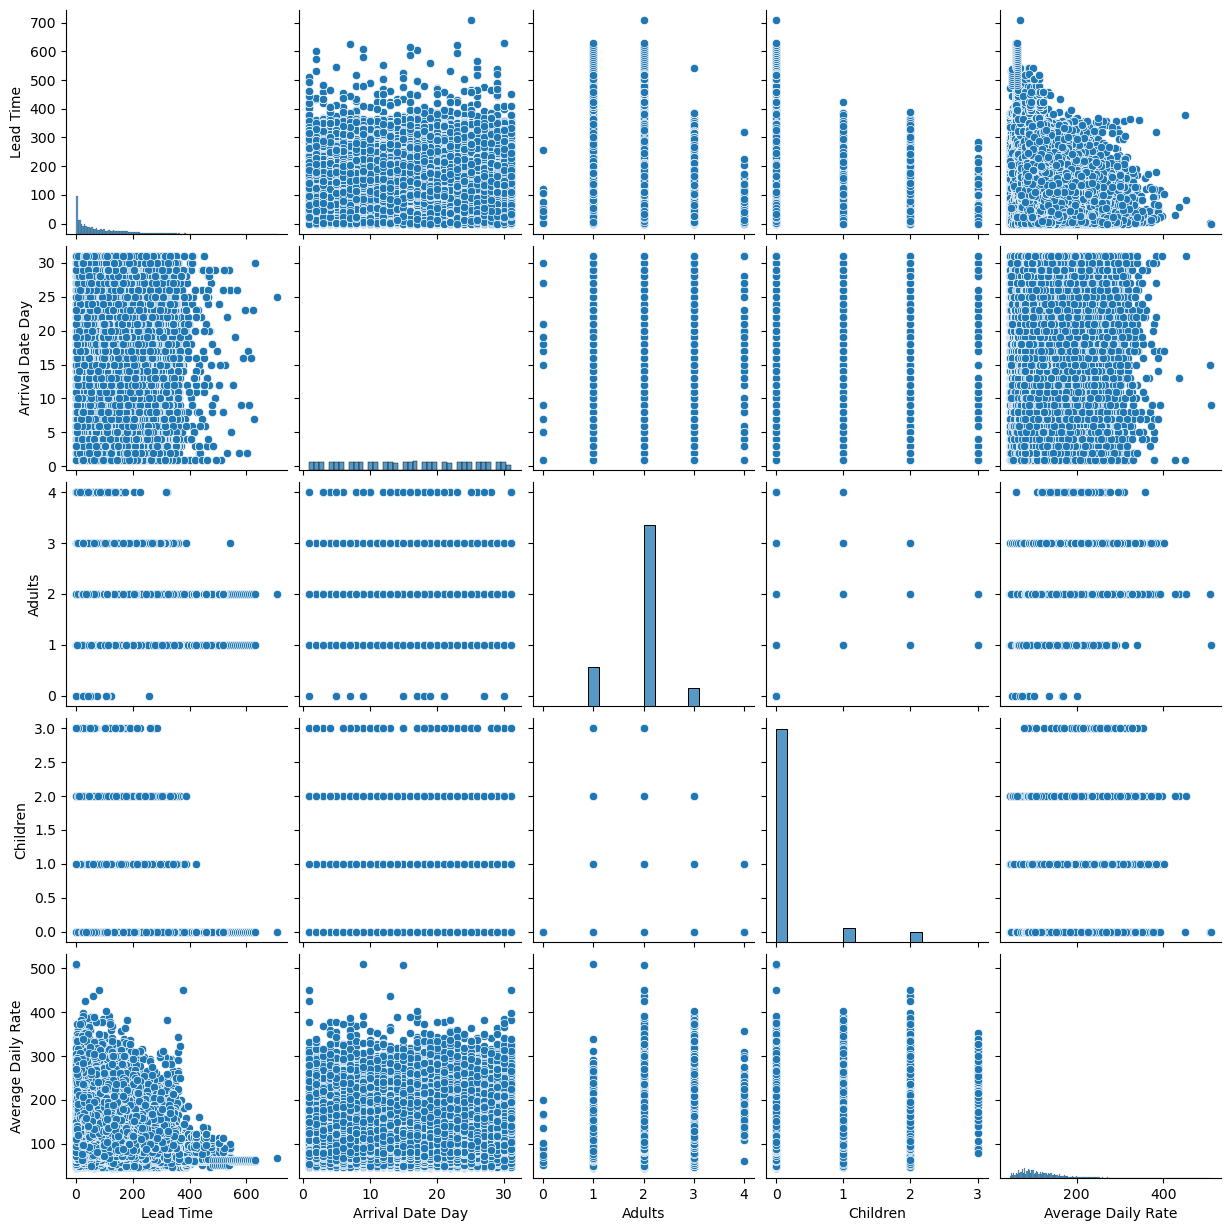

In [39]:
sns.pairplot(new_df)
plt.show()

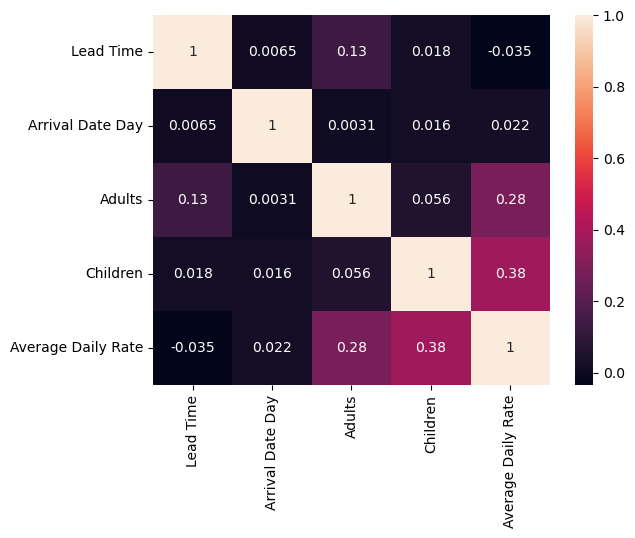

In [40]:
corr_mtx = new_df.corr()
sns.heatmap(corr_mtx, annot=True)
plt.show()

In [41]:
# Build predictive model
X = new_df.drop(COL_NAME_AVG_DLY_RATE, axis=1)
X = pd.get_dummies(X, drop_first=True) # one-hot encoding
y = new_df[COL_NAME_AVG_DLY_RATE]

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate predictive model
y_pred = model.predict(X_test)
rmse = np.sqrt(met.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {:.2f}'.format(rmse))

Root Mean Squared Error: 31.36


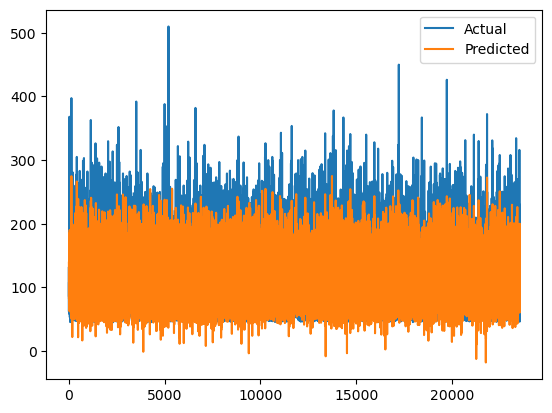

In [42]:
# Visualize predictive model
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()